In [50]:
import numpy as np
from pathlib import Path
import nibabel as nib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import skimage
import skimage.morphology
import skimage.io

In [51]:
from unet import get_model
from generator import Generator
from construct_dataset import construct_dataset, fill_dataset

In [52]:
model_preprocess = get_model((200, 200), 3)
model = get_model((200, 200), 2)

In [53]:
model_preprocess.load_weights('best_model_preprocess.h5')
model.load_weights('best_model.h5')

In [54]:
DATASET_PATH = "../../datasets"

In [55]:
root = Path(DATASET_PATH)
gts = np.load('Y_test.npy')
slices = np.load('X_test.npy')
img_idx_slices = np.load('X_test_slices.npy')

In [56]:
test_gen_preprocess = Generator(gts, slices, img_idx_slices, input_size=200, preprocess=True, output_size=200, batch_size=1)
test_gen = Generator(gts, slices, img_idx_slices, input_size=200, output_size=200, batch_size=1)

In [59]:
#result = model.evaluate(test_gen)

In [60]:
#result_preprocess = model_preprocess.evaluate(test_gen_preprocess)

In [13]:
ones = []
for i in range(len(test_gen_preprocess)):
    X, Y = test_gen_preprocess[i]
    ones.append(np.count_nonzero(Y))
ones = np.array(ones)

In [23]:
result_preprocess

[-0.05927353724837303,
 0.9972116351127625,
 0.7912279963493347,
 0.7594560384750366,
 0.05927353724837303]

In [62]:
#indices = np.argsort(-ones)

In [61]:
indices = np.array([48, 871, 875, 445, 691, 233, 522, 598, 540, 164, 912, 217, 332,
        91, 306, 206, 379, 373, 776, 228, 524, 787, 529, 432, 909, 204,
       257, 417, 866, 583, 565,  85, 525,  86, 402, 850, 648, 862, 148,
       809, 860,  34, 695, 439, 896, 562, 645, 703, 371, 923, 694, 174,
       854, 673, 487,  38, 160, 347, 175, 311, 404,   5, 139, 533, 327,
       621, 126, 885, 819, 708, 844, 602, 408, 782, 502, 193, 143, 357,
       855, 738, 456, 267, 863, 635, 678, 337, 508, 210, 389, 203, 650,
       423, 548, 270, 434,  26, 491, 805, 309, 764, 636, 350, 301, 397,
        99, 572, 480, 666, 730, 835, 818, 886, 899, 722, 634, 165, 501,
       387, 839, 599, 661, 588, 211,  53, 870, 696, 853, 335, 447, 355,
       346, 587, 780, 269, 720,  15, 601, 381, 245, 596,  41, 145, 266,
       294,  44, 296, 183, 249, 619, 595, 894, 500,  30, 385, 221, 281,
       507, 924, 704, 852, 275, 469, 107, 576, 509, 908, 856, 842, 639,
       103, 353, 430,  81,  89, 208, 681,  32, 535, 134, 579, 859, 900,
       121, 102, 419, 920, 170, 279, 762, 775,  13, 699, 177,  27, 436,
       530, 723, 759,   9, 669, 416, 106, 384, 400, 362, 409, 614, 517,
        56, 437, 847, 887, 463, 238, 299, 198, 560, 455, 308, 676,  93,
       624, 774, 895,  64, 721, 388,  50, 536, 905, 752, 640, 114, 258,
       349, 897, 334, 820, 364, 758, 564,   6, 528, 750,  20, 869, 918,
       841, 578, 135, 629, 495, 220, 761, 297, 771, 484, 608,   0, 790,
       810, 890, 207, 718, 898, 196, 235, 499, 392, 549, 880,  61,  73,
       709, 470, 571, 618, 753,  28, 200, 828, 195, 891, 331,  45, 657,
       830, 440, 171, 623, 366, 433, 822, 801, 653, 226, 322, 574,  39,
       104, 382, 550, 631, 609, 729, 660, 191, 380, 136, 129, 231, 667,
       372, 858, 553, 446, 262, 928, 544, 329, 317, 115, 429, 605, 563,
       812, 910, 849, 577, 615,  88, 757, 202, 773, 756, 557, 734, 580,
       735, 343, 505, 356, 358, 291, 555, 655, 339,  72, 915, 575, 707,
       581, 933, 289, 223, 781, 503, 401, 589, 243,  54, 201, 187, 130,
       706, 515, 767, 414, 798, 213, 100,  98, 556, 271, 112, 803, 637,
        19, 406, 745, 606, 250, 532, 931, 926, 914,  16, 794,  37, 310,
        58, 874, 882, 881, 883, 658, 638, 878, 656, 641, 649, 654, 652,
       643, 876, 644, 879, 651, 877, 646, 884, 647, 590, 642, 592, 889,
       906, 907, 613, 927, 612, 913, 611, 610, 925, 916, 597, 607, 604,
       603, 922, 921, 917, 919, 600, 616, 888, 904, 594, 633, 632, 932,
       630, 892, 893, 628, 627, 930, 901, 626, 625, 591, 929, 622, 902,
       593, 903, 620, 617, 911, 778, 662, 743, 742, 741, 740, 739, 737,
       736, 733, 732, 804, 731, 806, 807, 728, 808, 727, 726, 725, 724,
       811, 719, 813, 814, 717, 716, 715, 815, 744, 802, 800, 746, 779,
       772, 783, 784, 770, 785, 786, 769, 768, 766, 765, 788, 789, 714,
       763, 792, 760, 793, 755, 754, 795, 796, 797, 751, 799, 749, 748,
       747, 791, 713, 712, 711, 686, 846, 848, 685, 684, 683, 777, 851,
       680, 679, 677, 857, 861, 687, 675, 865, 674, 867, 672, 671, 670,
       868, 872, 668, 665, 664, 663, 873, 864, 659, 688, 690, 710, 816,
       817, 821, 705, 823, 824, 825, 826, 702, 827, 829, 701, 689, 700,
       697, 831, 832, 833, 834, 836, 837, 693, 838, 692, 840, 843, 845,
       698, 682, 467, 585, 176, 178, 179, 180, 181, 182, 184, 185, 186,
       188, 189, 190, 192, 194, 197, 199, 205, 173, 172, 169, 168, 146,
       147, 149, 150, 151, 152, 153, 154, 209, 155, 157, 158, 159, 161,
       162, 163, 166, 167, 156, 212, 214, 215, 252, 253, 254, 255, 256,
       259, 260, 261, 251, 263, 265, 268, 272, 273, 274, 276, 277, 278,
       264, 144, 248, 246, 216, 218, 219, 222, 224, 225, 227, 229, 247,
       230, 234, 236, 237, 239, 240, 241, 242, 244, 232, 280, 142, 140,
        40,  42,  43,  46,  47,  49,  51,  52,  55,  57,  59,  60,  62,
        63,  65,  66,  67,  36,  35,  33,  31,   1,   2,   3,   4,   7,
         8,  10,  11,  68,  12,  17,  18,  21,  22,  23,  24,  25,  29,
        14,  69,  70,  71, 111, 113, 116, 117, 118, 119, 120, 122, 110,
       123, 125, 127, 128, 131, 132, 133, 137, 138, 124, 141, 109, 105,
        74,  75,  76,  77,  78,  79,  80,  82, 108,  83,  87,  90,  92,
        94,  95,  96,  97, 101,  84, 282, 283, 284, 473, 474, 475, 476,
       477, 478, 479, 481, 482, 483, 485, 486, 488, 489, 490, 492, 493,
       472, 471, 468, 934, 443, 444, 448, 449, 450, 451, 452, 453, 494,
       454, 458, 459, 460, 461, 462, 464, 465, 466, 457, 496, 497, 498,
       543, 545, 546, 547, 551, 552, 554, 558, 542, 559, 566, 567, 568,
       569, 570, 573, 582, 584, 561, 442, 541, 538, 504, 506, 510, 511,
       512, 513, 514, 516, 539, 518, 520, 521, 523, 526, 527, 531, 534,
       537, 519, 441, 438, 435, 320, 321, 323, 324, 325, 326, 328, 330,
       319, 333, 338, 340, 341, 342, 344, 345, 348, 351, 336, 352, 318,
       315, 285, 286, 287, 288, 290, 292, 293, 295, 316, 298, 302, 303,
       304, 305, 307, 312, 313, 314, 300, 586, 354, 360, 403, 405, 407,
       410, 411, 412, 413, 415, 399, 418, 421, 422, 424, 425, 426, 427,
       428, 431, 420, 359, 398, 395, 361, 363, 365, 367, 368, 369, 370,
       374, 396, 375, 377, 378, 383, 386, 390, 391, 393, 394, 376, 935])
# Prevent from computing it again

In [62]:
def correct_incorrect(pred, y):
    # Among all the true labels of the pred, which ones are correct and incorrect
    h, w, _ = pred.shape
    new_image = np.zeros((h, w, 3))
    incorrect = pred - y
    correct = (pred == 1) & (y == 1)
    for i in range(h):
        for j in range(w):
            if correct[i][j] == 1:
                new_image[i][j] = (0, 1, 0) # R, G, B
            if incorrect[i][j] == 1:
                new_image[i][j] = (1, 0, 0)
    return new_image
    

def show_results(model, test_gen, images, nb_channels=2):
    nb_rows = len(images)
    nb_cols = 2 + nb_channels + 1
    col_size = 8 * (2 + nb_channels)
    cpt = 0
    plt.figure(figsize=(col_size, 6 * nb_rows))
    for img_idx in images:
        X, Y = test_gen[img_idx]
        Y = Y.reshape(200, 200, 1)
        result = model(X).numpy().reshape(200, 200, 1) > 0.5
        X = X.reshape(200, 200, nb_channels)
        # Plot X
        for i in range(nb_channels):
            plt.subplot(nb_rows, nb_cols, nb_cols * cpt + i + 1)
            plt.imshow(X[:, :, i], cmap='gray')
            plt.title(f'Slice {i + 1}')
        # Plot Y
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + nb_channels+ 1)
        plt.imshow(result, cmap='gray')
        plt.title('Pred')
        
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + nb_channels + 2)
        plt.imshow(Y, cmap='gray')
        plt.title('Ref')
        
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + nb_channels + 3)
        new_img = correct_incorrect(result, Y)
        plt.imshow(new_img)
        plt.title('Correct/Incorrect')
        
        cpt += 1
    plt.show()

(1, 200, 200, 3)
(1, 200, 200, 3)
(1, 200, 200, 3)
(1, 200, 200, 3)


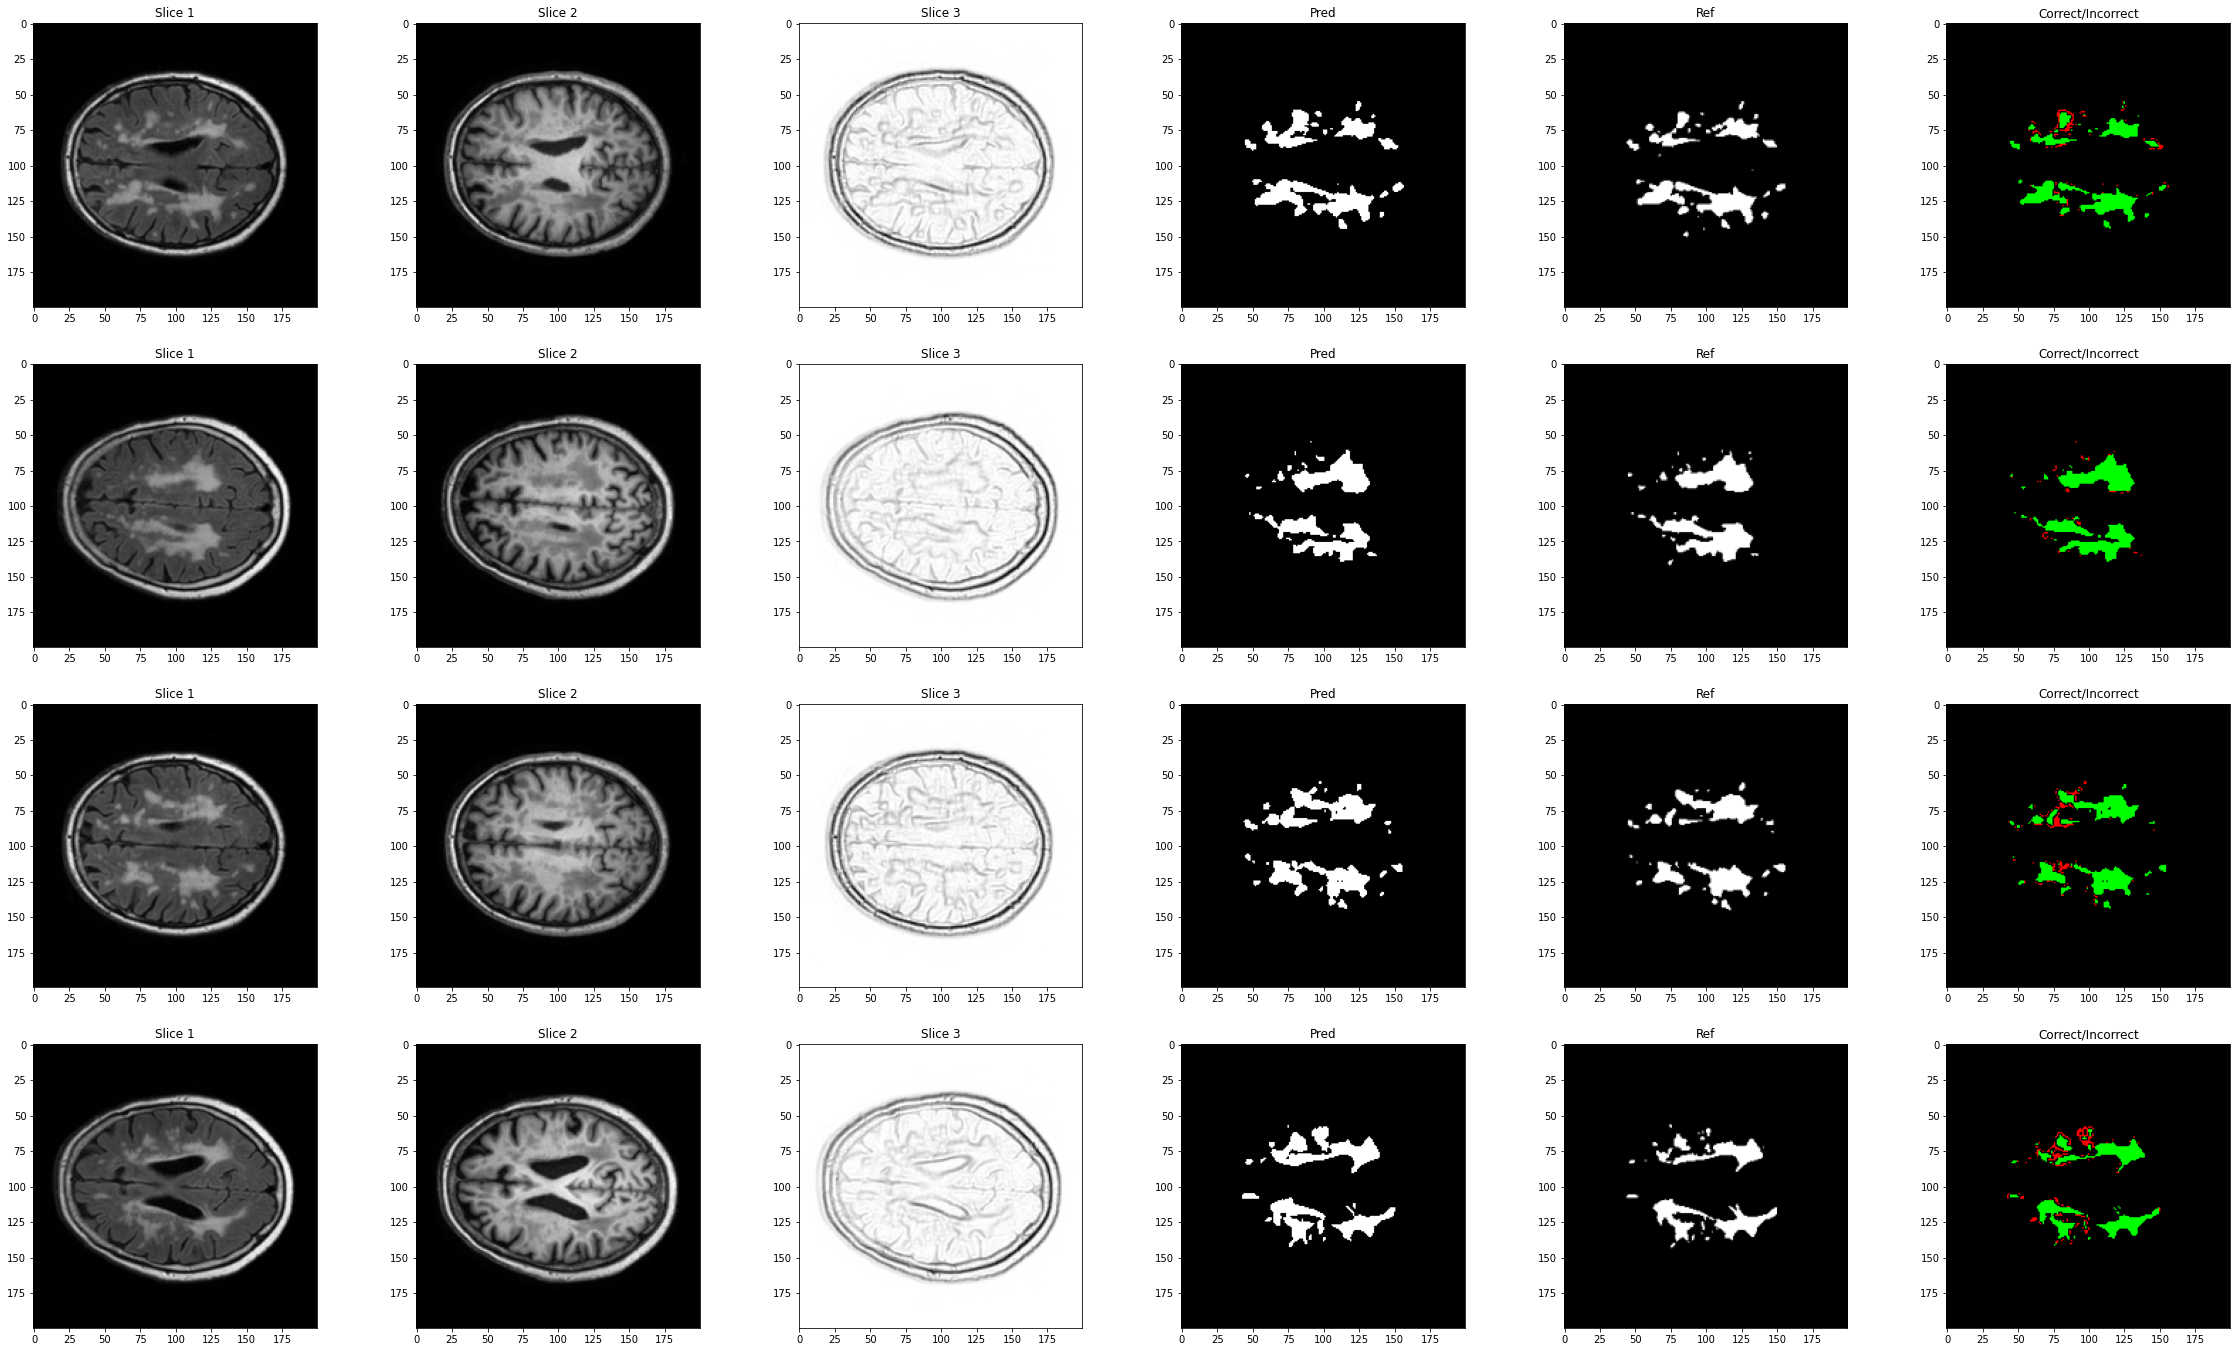

In [63]:
batch_number = 0
show_results(model_preprocess, test_gen_preprocess, indices[batch_number * 4: batch_number * 4 + 4], 3)

In [81]:
def test_models(model, model_preprocess, test_gen, test_gen_preprocess, images):
    nb_rows = len(images)
    nb_cols = 5 + 2
    col_size = 8 * nb_cols
    cpt = 0
    plt.figure(figsize=(col_size, 6 * nb_rows))
    for img_idx in images:
        X, Y = test_gen[img_idx]
        Y = Y.reshape(200, 200, 1)
        result = model(X).numpy().reshape(200, 200, 1) > 0.5
        X = X.reshape(200, 200, 2)
        # Plot X
        for i in range(2):
            plt.subplot(nb_rows, nb_cols, nb_cols * cpt + i + 1)
            plt.imshow(X[:, :, i], cmap='gray')
            plt.title(f'Slice {i + 1}')
        # Plot Y
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + 2 + 1)
        plt.imshow(Y, cmap='gray')
        plt.title('Ref')
        
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + 2+ 2)
        plt.imshow(result, cmap='gray')
        plt.title('Pred w/o preprocess')
        
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + 2 + 4)
        new_img = correct_incorrect(result, Y)
        plt.imshow(new_img)
        plt.title('Correct/Incorrect w/o preprocess')
        
        X1, _ = test_gen_preprocess[img_idx]
        result1 = model_preprocess(X1).numpy().reshape(200, 200, 1) > 0.5
        
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + 2 + 3)
        plt.imshow(result1, cmap='gray')
        plt.title('Pred with preprocess')
        
        plt.subplot(nb_rows, nb_cols, nb_cols * cpt + 2 + 5)
        new_img1 = correct_incorrect(result1, Y)
        plt.imshow(new_img1)
        plt.title('Correct/Incorrect with preprocess')
        cpt += 1
    plt.show()

(1, 200, 200, 2)
(1, 200, 200, 3)
(1, 200, 200, 2)
(1, 200, 200, 3)
(1, 200, 200, 2)
(1, 200, 200, 3)
(1, 200, 200, 2)
(1, 200, 200, 3)


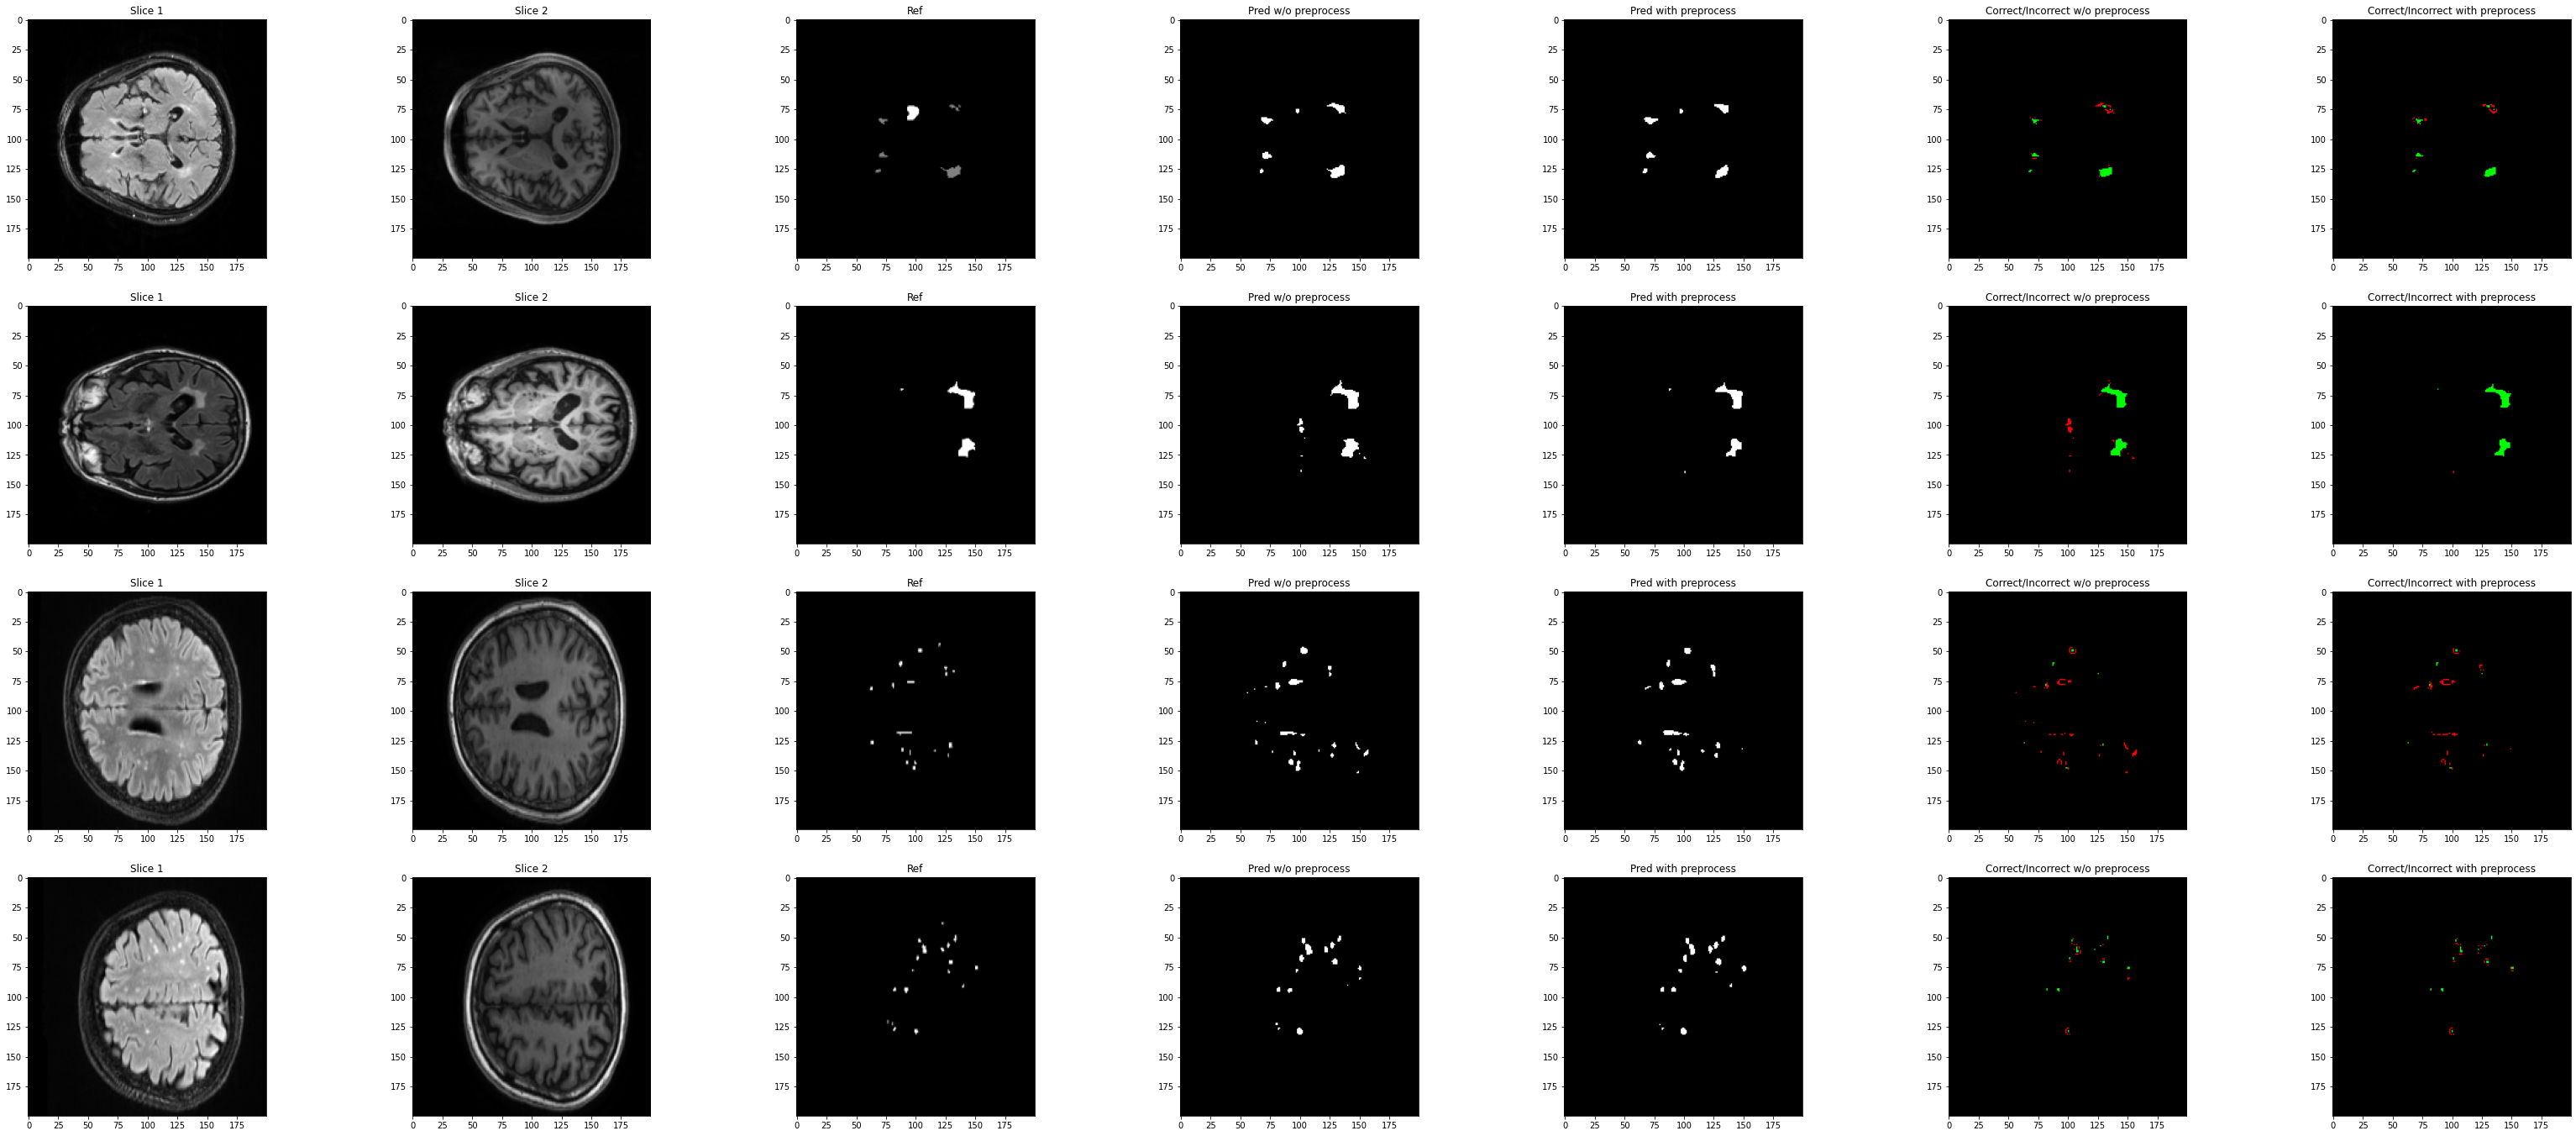

In [88]:
batch_number = 25
test_models(model, model_preprocess, test_gen, test_gen_preprocess,
             indices[batch_number * 4: batch_number * 4 + 4])